## Time Series Data Manipulation

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
from vega_datasets import data

In [3]:
df = data.sf_temps()

Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
df = df.set_index('date')

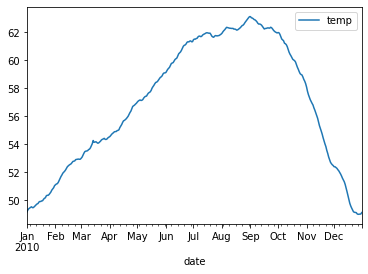

In [7]:
df.resample('D').mean().plot()

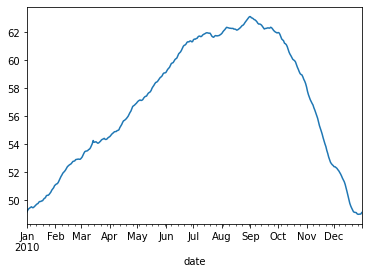

In [9]:
df.temp.resample('D').mean().plot()

1. Write the code necessary to visualize the minimum temperature over time.
1. Write the code necessary to visualize the maximum temperature over time.

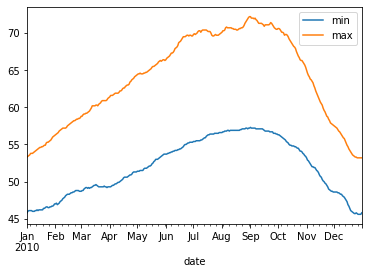

In [11]:
df.temp.resample('D').agg(['min', 'max']).plot()

1. Which month is the coldest, on average?
1. Which month has the highest average temperature?

In [13]:
df.temp.resample('M').mean().sort_values()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
2010-04-30    55.633056
2010-05-31    57.970968
2010-10-31    60.253091
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
Name: temp, dtype: float64

1. Resample by the day and calculate the min and max temp for the day (Hint:
   `.agg(['min', 'max'])`). Use this resampled dataframe to calculate the change
   in temperature for the day. Which month has the highest daily temperature
   variability?

In [20]:
daily = df.temp.resample('D').agg(['min', 'max'])
daily['temp_diff'] = daily['max'] - daily['min']
daily.temp_diff.resample('M').max().sort_values()

date
2010-12-31     8.9
2010-01-31     9.3
2010-02-28     9.9
2010-11-30    11.8
2010-03-31    12.0
2010-04-30    13.0
2010-05-31    13.1
2010-10-31    14.4
2010-06-30    14.8
2010-07-31    14.8
2010-09-30    14.9
2010-08-31    15.0
Name: temp_diff, dtype: float64

1. **Bonus**: Visualize the daily min, average, and max temperature over time on a
   single line plot, i.e. the min, average, and maximum temperature should be 3
   seperate lines.

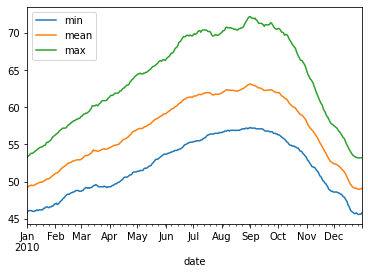

In [21]:
df.temp.resample('D').agg(['min', 'mean', 'max']).plot()

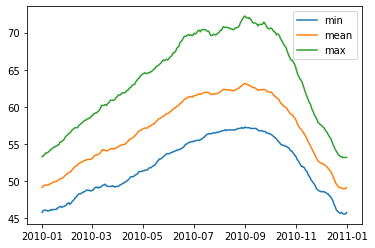

In [24]:
daily_min = df.temp.resample('D').min()
daily_mean = df.temp.resample('D').mean()
daily_max = df.temp.resample('D').max()

plt.plot(daily_min.index, daily_min, label='min')
plt.plot(daily_mean.index, daily_mean, label='mean')
plt.plot(daily_max.index, daily_max, label='max')
plt.legend()

In [29]:
df = data.seattle_weather().set_index('date')
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


- Which year and month combination has the highest amount of precipitation?

In [36]:
df.resample('M').precipitation.sum().sort_values().tail(5)

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

- Visualize the amount of monthly precipitation over time.

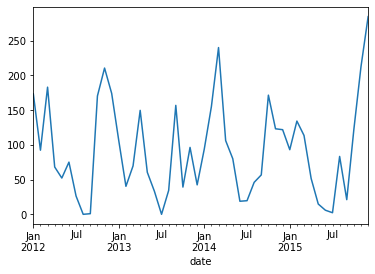

In [38]:
df.resample('M').precipitation.sum().plot()

- Visualize the amount of wind over time. Choose a time interval you think is
  appropriate.

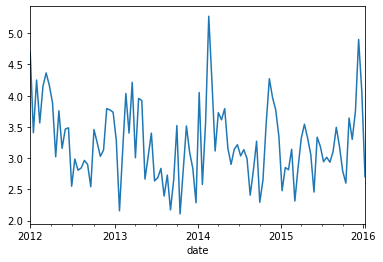

In [43]:
df.wind.resample('2W').mean().plot()

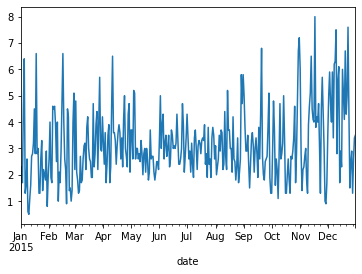

In [42]:
df['2015'].wind.plot()

- Which year-month combination is the windiest?

In [45]:
df.wind.resample('M').mean().sort_values().tail(5)

date
2012-02-29    3.903448
2014-11-30    3.983333
2012-03-31    4.248387
2015-12-31    4.341935
2014-02-28    4.528571
Name: wind, dtype: float64

- What's the sunniest year? (Hint: which day has the highest number of days
  where weather == sun?)

In [46]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [48]:
df['is_sunny'] = df.weather == 'sun'
df.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False
2012-01-03,0.8,11.7,7.2,2.3,rain,False
2012-01-04,20.3,12.2,5.6,4.7,rain,False
2012-01-05,1.3,8.9,2.8,6.1,rain,False


In [50]:
df.is_sunny.resample('Y').sum()

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: is_sunny, dtype: int64

- In which month does it rain the most?

In [54]:
df['month'] = df.index.month
df.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,1
2012-01-02,10.9,10.6,2.8,4.5,rain,False,1
2012-01-03,0.8,11.7,7.2,2.3,rain,False,1
2012-01-04,20.3,12.2,5.6,4.7,rain,False,1
2012-01-05,1.3,8.9,2.8,6.1,rain,False,1


In [55]:
df.groupby('month').precipitation.sum()

month
1     466.0
2     422.0
3     606.2
4     375.4
5     207.5
6     132.9
7      48.2
8     163.7
9     235.5
10    503.4
11    642.5
12    622.7
Name: precipitation, dtype: float64

- Which month has the most number of days with a non-zero amount of
  precipitation?
  
    - we need to find whether or not it rained each day (non-zero precipitation)
    - aggregate this by month

In [62]:
df['did_rain'] = df.precipitation > 0
df.groupby('month').did_rain.mean()

month
1     0.532258
2     0.646018
3     0.588710
4     0.491667
5     0.274194
6     0.308333
7     0.088710
8     0.177419
9     0.291667
10    0.491935
11    0.591667
12    0.653226
Name: did_rain, dtype: float64

In [65]:
df = data.flights_20k().set_index('date')
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND


- Convert any negative delays to 0.

There's several ways to do this, all will give an equivalent result.

In [68]:
# cond, value_if_true, value_if_false
df.delay = np.where(df.delay < 0, 0, df.delay)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [70]:
def convert_less_than_zero_to_zero(x):
    if x < 0:
        return 0
    else:
        return x

df.delay.apply(convert_less_than_zero_to_zero)

date
2001-01-13 14:56:00    32
2001-01-31 16:40:00     0
2001-02-11 18:39:00     3
2001-01-10 21:00:00     0
2001-03-30 21:45:00     0
                       ..
2001-03-22 15:10:00     4
2001-01-19 13:05:00     0
2001-02-07 11:37:00     0
2001-02-24 16:50:00    42
2001-03-14 11:33:00     0
Name: delay, Length: 20000, dtype: int64

In [71]:
df.loc[df.delay < 0, 'delay'] = 0

In [72]:
# cond, value_if_false (if cond is true, use the original value)
df.delay.where(df.delay >= 0, 0)

date
2001-01-13 14:56:00    32
2001-01-31 16:40:00     0
2001-02-11 18:39:00     3
2001-01-10 21:00:00     0
2001-03-30 21:45:00     0
                       ..
2001-03-22 15:10:00     4
2001-01-19 13:05:00     0
2001-02-07 11:37:00     0
2001-02-24 16:50:00    42
2001-03-14 11:33:00     0
Name: delay, Length: 20000, dtype: int64

- Which hour of the day has the highest average delay?

In [74]:
df.resample('H').delay.mean()

date
2001-01-01 00:00:00    14.000000
2001-01-01 01:00:00          NaN
2001-01-01 02:00:00          NaN
2001-01-01 03:00:00          NaN
2001-01-01 04:00:00          NaN
                         ...    
2001-03-31 17:00:00    11.666667
2001-03-31 18:00:00    12.538462
2001-03-31 19:00:00    22.125000
2001-03-31 20:00:00    27.600000
2001-03-31 21:00:00    11.200000
Freq: H, Name: delay, Length: 2158, dtype: float64

In [76]:
df['hour'] = df.index.hour
df.groupby('hour').delay.mean()

hour
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

- Does the day of the week make a difference in the delay amount?

In [81]:
df['day_of_the_week'] = df.index.day_name()
df.groupby('day_of_the_week').delay.mean().sort_values()

day_of_the_week
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

- Does the month make a difference in the delay amount?

In [82]:
df.groupby(df.index.month).delay.mean()

date
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64